In [1]:
## Water Quality Analysis

#### <u> Drinking water potability </u>



#### <u> Context </u>

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.


#### <u> Content </u>

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

<b> 1. pH value: </b>
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

<b> 2. Hardness: </b>
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

<b> 3. Solids (Total dissolved solids - TDS): </b>
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

<b> 4. Chloramines: </b>
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

<b> 5. Sulfate: </b>
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

<b> 6. Conductivity: </b>
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

<b> 7. Organic_carbon: </b>
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

<b> 8. Trihalomethanes: </b>
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

<b> 9. Turbidity: </b>
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

<b> 10. Potability: </b>
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.




In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
###!pip install -r https://raw.githubusercontent.com/bentoml/BentoML/main/examples/quickstart/requirements.txt

In [4]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [6]:
# Importing all datasets
water_portability = pd.read_csv("water_potability.csv")
water_portability.head(4)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0


In [7]:
water_portability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
water_portability.shape

(3276, 10)

In [9]:
water_portability.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [11]:
median=water_portability.ph.median()

In [12]:
impute_nan(water_portability,"ph",median)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

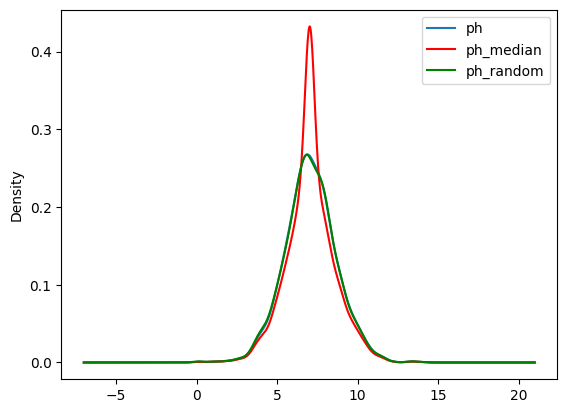

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

water_portability.ph.plot(kind='kde', ax=ax)
water_portability.ph_median.plot(kind='kde', ax=ax, color='red')
water_portability.ph_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [15]:
water_portability = water_portability.drop(columns=["ph","ph_median"])

In [16]:
water_portability = water_portability.rename(columns={"ph_random": "ph"})

In [17]:
median=water_portability.Sulfate.median()

In [18]:
impute_nan(water_portability,"Sulfate",median)

In [19]:
water_portability = water_portability.drop(columns=["Sulfate","Sulfate_median"])

In [20]:
water_portability = water_portability.rename(columns={"Sulfate_random": "Sulfate"})

In [21]:
median=water_portability.Trihalomethanes.median()

In [22]:
impute_nan(water_portability,"Trihalomethanes",median)

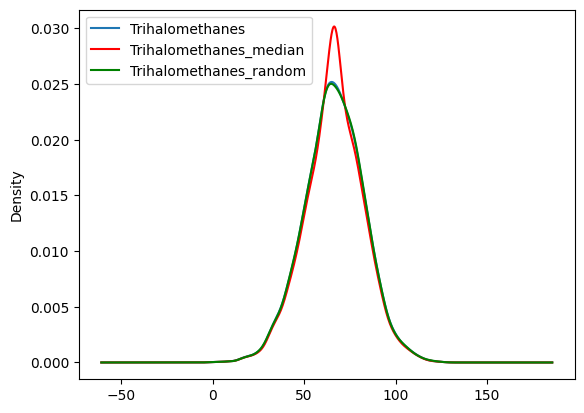

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

water_portability.Trihalomethanes.plot(kind='kde', ax=ax)
water_portability.Trihalomethanes_median.plot(kind='kde', ax=ax, color='red')
water_portability.Trihalomethanes_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [24]:
water_portability = water_portability.drop(columns=["Trihalomethanes","Trihalomethanes_median"])

In [25]:
water_portability = water_portability.rename(columns={"Trihalomethanes_random": "Trihalomethanes"})

In [26]:
water_portability.isnull().sum()

Hardness           0
Solids             0
Chloramines        0
Conductivity       0
Organic_carbon     0
Turbidity          0
Potability         0
ph                 0
Sulfate            0
Trihalomethanes    0
dtype: int64

In [27]:
water_portability.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

#### BENTO  ML

**BentoML** is designed for teams working to bring **machine learning (ML)** models into production in a reliable, scalable, and cost-efficient way. In particular, AI application developers can leverage **BentoML** to easily integrate state-of-the-art pre-trained models into their applications. By seamlessly bridging the gap between model creation and production deployment, BentoML promotes collaboration between **developers** and in-house **data science teams**.

In [28]:
import bentoml

In [29]:

import pandas as pd
from bentoml.io import NumpyNdarray, PandasDataFrame, JSON
import numpy as np
from pydantic import BaseModel

c:\Users\Debmalya Ray\.conda\envs\ml_env\Lib\site-packages\bentoml\io.py:7: BentoMLDeprecationWarning: `bentoml.io` is deprecated since BentoML v1.4 and will be removed in a future version. Please upgrade to new style IO types instead.
  warn_deprecated(


In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [31]:
water_portability.columns

Index(['Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon',
       'Turbidity', 'Potability', 'ph', 'Sulfate', 'Trihalomethanes'],
      dtype='object')

In [32]:
water_portability.head(1)

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability,ph,Sulfate,Trihalomethanes
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0,9.074923,368.516441,86.99097


In [33]:
X = water_portability.drop(columns = "Potability")

In [34]:
Y = water_portability["Potability"]

In [35]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [37]:
bentoml.sklearn.save_model("scaler", scaler)

Model(tag="scaler:v3qzy7ffm6c4zufn", path="C:\Users\Debmalya Ray\bentoml\models\scaler\v3qzy7ffm6c4zufn\")

In [ ]:
###! bentoml models list

 Tag                      Module           Size      Creation Time       
 scaler:v3qzy7ffm6c4zufn  bentoml.sklearn  1.57 KiB  2024-11-18 10:13:40 


In [39]:
water_portability.head(4)

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability,ph,Sulfate,Trihalomethanes
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0,9.074923,368.516441,86.990970
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,0,3.716080,298.082462,56.329076
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,0,8.099124,367.224297,66.420093
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,0,8.316766,356.886136,100.341674


In [40]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [41]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2293, 9) (983, 9) (2293,) (983,)


In [42]:
from sklearn import svm

In [43]:
clf_svm = svm.SVC(gamma='scale')

In [45]:
bentoml.sklearn.save_model("clf_svm", clf_svm)
clf_svm.fit(X_train, y_train)

SVC()

In [46]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
bentoml.sklearn.save_model("clf_rf", clf_rf)

Model(tag="clf_rf:4edzjoffm6xgjufn", path="C:\Users\Debmalya Ray\bentoml\models\clf_rf\4edzjoffm6xgjufn\")

In [49]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
bentoml.sklearn.save_model("clf_dt", clf_dt)

Model(tag="clf_dt:47nt575fm6pyzufn", path="C:\Users\Debmalya Ray\bentoml\models\clf_dt\47nt575fm6pyzufn\")

In [51]:
clf_lg = LogisticRegression()
clf_lg.fit(X_train, y_train)

LogisticRegression()

In [52]:
bentoml.sklearn.save_model("clf_lg", clf_lg)

Model(tag="clf_lg:6n2oas5fm6tmzufn", path="C:\Users\Debmalya Ray\bentoml\models\clf_lg\6n2oas5fm6tmzufn\")

In [53]:
scaler = bentoml.sklearn.get("scaler:latest").to_runner()
clf_svm = bentoml.sklearn.get("clf_svm:latest").to_runner()
clf_rf = bentoml.sklearn.get("clf_rf:latest").to_runner()
clf_dt = bentoml.sklearn.get("clf_dt:latest").to_runner()
clf_lg = bentoml.sklearn.get("clf_lg:latest").to_runner()


c:\Users\Debmalya Ray\.conda\envs\ml_env\Lib\site-packages\bentoml\_internal\models\model.py:367: BentoMLDeprecationWarning: `get_runnable` is deprecated since BentoML v1.4 and will be removed in a future version. Use `get_service` instead.
  self._runnable = self.info.imported_module.get_runnable(self)
c:\Users\Debmalya Ray\.conda\envs\ml_env\Lib\site-packages\bentoml\_internal\models\model.py:354: BentoMLDeprecationWarning: `Runner` is deprecated since BentoML v1.4 and will be removed in a future version. Please upgrade to new style services.
  return Runner(


In [54]:
scaler.init_local()
clf_svm.init_local()
clf_rf.init_local()
clf_dt.init_local()
clf_lg.init_local()


'Runner.init_local' is for debugging and testing only. Make sure to remove it before deploying to production.
'Runner.init_local' is for debugging and testing only. Make sure to remove it before deploying to production.
'Runner.init_local' is for debugging and testing only. Make sure to remove it before deploying to production.
'Runner.init_local' is for debugging and testing only. Make sure to remove it before deploying to production.
'Runner.init_local' is for debugging and testing only. Make sure to remove it before deploying to production.


In [ ]:
###!bentoml models list

 Tag                       Module           Size       Creation Time       
 clf_lg:6n2oas5fm6tmzufn   bentoml.sklearn  1.69 KiB   2024-11-18 10:15:35 
 clf_dt:47nt575fm6pyzufn   bentoml.sklearn  75.84 KiB  2024-11-18 10:15:16 
 clf_rf:4edzjoffm6xgjufn   bentoml.sklearn  6.20 MiB   2024-11-18 10:15:04 
 clf_svm:ypczguvfm6qrzufn  bentoml.sklearn  688.00 B   2024-11-18 10:14:15 
 scaler:v3qzy7ffm6c4zufn   bentoml.sklearn  1.57 KiB   2024-11-18 10:13:40 


In [ ]:
##!bentoml models get clf_svm:latest

name: clf_svm
version: ypczguvfm6qrzufn
module: bentoml.sklearn
labels: {}
options: {}
metadata: {}
context:
  framework_name: sklearn
  framework_versions:
    scikit-learn: 1.5.0
  bentoml_version: 1.3.12
  python_version: 3.12.3
signatures:
  predict:
    batchable: false
api_version: v1
creation_time: '2024-11-18T04:44:15.650467+00:00'



In [ ]:
###!bentoml models get clf_rf:latest

name: clf_rf
version: 4edzjoffm6xgjufn
module: bentoml.sklearn
labels: {}
options: {}
metadata: {}
context:
  framework_name: sklearn
  framework_versions:
    scikit-learn: 1.5.0
  bentoml_version: 1.3.12
  python_version: 3.12.3
signatures:
  predict:
    batchable: false
api_version: v1
creation_time: '2024-11-18T04:45:04.736967+00:00'



In [ ]:
###!bentoml models get clf_dt:latest

name: clf_dt
version: 47nt575fm6pyzufn
module: bentoml.sklearn
labels: {}
options: {}
metadata: {}
context:
  framework_name: sklearn
  framework_versions:
    scikit-learn: 1.5.0
  bentoml_version: 1.3.12
  python_version: 3.12.3
signatures:
  predict:
    batchable: false
api_version: v1
creation_time: '2024-11-18T04:45:16.190466+00:00'



In [ ]:
###!bentoml models get clf_lg:latest

name: clf_lg
version: 6n2oas5fm6tmzufn
module: bentoml.sklearn
labels: {}
options: {}
metadata: {}
context:
  framework_name: sklearn
  framework_versions:
    scikit-learn: 1.5.0
  bentoml_version: 1.3.12
  python_version: 3.12.3
signatures:
  predict:
    batchable: false
api_version: v1
creation_time: '2024-11-18T04:45:35.652233+00:00'



In [ ]:
###!bentoml models get scaler:latest

name: scaler
version: v3qzy7ffm6c4zufn
module: bentoml.sklearn
labels: {}
options: {}
metadata: {}
context:
  framework_name: sklearn
  framework_versions:
    scikit-learn: 1.5.0
  bentoml_version: 1.3.12
  python_version: 3.12.3
signatures:
  predict:
    batchable: false
api_version: v1
creation_time: '2024-11-18T04:43:40.602049+00:00'



In [62]:
print(X_train.columns)
print(X_test.columns)

Index(['Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon',
       'Turbidity', 'ph', 'Sulfate', 'Trihalomethanes'],
      dtype='object')
Index(['Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon',
       'Turbidity', 'ph', 'Sulfate', 'Trihalomethanes'],
      dtype='object')


In [63]:
X_train = pd.DataFrame(X_train)

In [64]:
X_test = pd.DataFrame(X_test)

In [65]:
y_train = pd.DataFrame(y_train)

In [66]:
y_test = pd.DataFrame(y_test)

In [67]:
y_train.rename(columns = {0:"Potability"}, inplace=True)
y_test.rename(columns = {0:"Potability"}, inplace=True)

In [68]:
#scaler = bentoml.sklearn.get("scaler:latest").to_runner()
##clf_svm = bentoml.sklearn.get("clf_svm:latest").to_runner()
#clf_rf = bentoml.sklearn.get("clf_rf:latest").to_runner()
#clf_dt = bentoml.sklearn.get("clf_dt:latest").to_runner()
#clf_lg = bentoml.sklearn.get("clf_lg:latest").to_runner()


In [69]:
import bentoml
from bentoml.io import NumpyNdarray
from bentoml.io import PandasDataFrame
import pandas as pd
from bentoml.io import NumpyNdarray, PandasDataFrame, JSON 
import numpy as np 
from pydantic import BaseModel

import numpy as np
import pandas as pd

In [70]:
import pandas as pd
scaler = bentoml.sklearn.get("scaler:latest").to_runner()
clf_rf = bentoml.sklearn.get("clf_rf:latest").to_runner()
service = bentoml.Service("water_quality_prediction", runners=[scaler, clf_rf])


c:\Users\Debmalya Ray\.conda\envs\ml_env\Lib\site-packages\bentoml\_internal\models\model.py:367: BentoMLDeprecationWarning: `get_runnable` is deprecated since BentoML v1.4 and will be removed in a future version. Use `get_service` instead.
  self._runnable = self.info.imported_module.get_runnable(self)
c:\Users\Debmalya Ray\.conda\envs\ml_env\Lib\site-packages\bentoml\_internal\models\model.py:354: BentoMLDeprecationWarning: `Runner` is deprecated since BentoML v1.4 and will be removed in a future version. Please upgrade to new style services.
  return Runner(
C:\Users\Debmalya Ray\AppData\Local\Temp\ipykernel_21672\169139023.py:4: BentoMLDeprecationWarning: `bentoml.Service` is deprecated since BentoML v1.4 and will be removed in a future version. Please upgrade to @bentoml.service().
  service = bentoml.Service("water_quality_prediction", runners=[scaler, clf_rf])


In [71]:
class WaterQuality(BaseModel):
    Hardness: float = 129.422921
    Solids: float = 18630.057858
    Chloramines: float = 6.635246
    Conductivity: float = 592.885359
    Organic_carbon: float = 15.180013
    Turbidity: float = 4.500656
    ph: float = 3.716080
    Sulfate: float = 298.082462
    Trihalomethanes: float = 56.329076
    
@service.api(input=JSON(pydantic_model=WaterQuality), output=NumpyNdarray())

def predict(data: WaterQuality) -> np.array:
    
    df = pd.DataFrame(data.dict(), index=[0])
    
    scaled_df  = pd.DataFrame([scaler.run(df)], columns=df.columns)

    # Predict data
    result = clf_rf.predict.run(scaled_df)
    return np.array(result)

In [72]:

scaler = bentoml.sklearn.get("scaler:latest").to_runner()
clf_rf = bentoml.sklearn.get("clf_rf:latest").to_runner()
service = bentoml.Service("water_quality_prediction", runners=[scaler, clf_rf])
@service.api(input=PandasDataFrame(), output=NumpyNdarray())
def predict(df: pd.DataFrame) -> np.array:

    # Process data
    scaled_df  = pd.DataFrame([scaler.run(df)], columns=df.columns)
    #processed_df = pd.DataFrame([pca.run(df)], columns=['col1', 'col2', 'col3'])

    # Predict data
    result = clf_rf.predict.run(scaled_df)
    return np.array(result)


C:\Users\Debmalya Ray\AppData\Local\Temp\ipykernel_21672\1733111062.py:3: BentoMLDeprecationWarning: `bentoml.Service` is deprecated since BentoML v1.4 and will be removed in a future version. Please upgrade to @bentoml.service().
  service = bentoml.Service("water_quality_prediction", runners=[scaler, clf_rf])


In [83]:
%%writefile service.py
import bentoml
from bentoml.io import NumpyNdarray
from bentoml.io import PandasDataFrame
import pandas as pd
from bentoml.io import NumpyNdarray, PandasDataFrame, JSON 
import numpy as np 
from pydantic import BaseModel

import numpy as np
import pandas as pd
import pandas as pd

scaler = bentoml.sklearn.get("scaler:latest").to_runner()
clf_rf = bentoml.sklearn.get("clf_rf:latest").to_runner()
service = bentoml.Service("water_quality_prediction", runners=[scaler, clf_rf])

class WaterQuality(BaseModel):
    Hardness: float = 129.422921
    Solids: float = 18630.057858
    Chloramines: float = 6.635246
    Conductivity: float = 592.885359
    Organic_carbon: float = 15.180013
    Turbidity: float = 4.500656
    ph: float = 3.716080
    Sulfate: float = 298.082462
    Trihalomethanes: float = 56.329076
    
@service.api(input=JSON(pydantic_model=WaterQuality), output=NumpyNdarray())

def predict(data: WaterQuality) -> np.array:
    
    df = pd.DataFrame(data.dict(), index=[0])
    
    scaled_df  = pd.DataFrame([scaler.run(df)], columns=df.columns)

    # Predict data
    result = clf_rf.predict.run(scaled_df)
    return np.array(result)

Overwriting service.py


In [81]:
import bentoml
bento_model: bentoml.Model = bentoml.models.get("clf_rf:latest")

print(bento_model.path)
print(bento_model.info.metadata)
print(bento_model.info.labels)

C:\Users\Debmalya Ray\bentoml\models\clf_rf\4edzjoffm6xgjufn
{}
{}


In [82]:
###!bentoml serve service:service

In [81]:
###! bentoml serve service.py:service --reload

^C
